In [1]:
from fastai.vision.all import *

matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/home/vscode/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/vscode/.fastai/data/mnist_sample/train/3/10091.png')...]

In [4]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

# Load all images

In [5]:
three_images = [Image.open(p) for p in threes]
seven_images = [Image.open(p) for p in sevens]
im = three_images[1]
im.show()

In [6]:
im3_t = tensor(im)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [7]:
# build a 2d tensor from a list of images
three_tensors = [tensor(im) for im in three_images]
seven_tensors = [tensor(im) for im in seven_images]
len(three_tensors)


6131

In [8]:
# combine and normalize
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

torch.Size([28, 28])

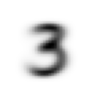

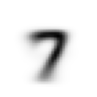

In [9]:
stacked_threes.mean((0)).shape
avg_three = stacked_threes.mean((0))
show_image(avg_three)
avg_seven = stacked_sevens.mean((0))
show_image(avg_seven)
avg_three.shape




torch.Size([13, 13])

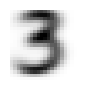

In [10]:
swap = F.pad(avg_three[5:,5:], (0,5,0,5), "constant", 0)
swap.shape

show_image(avg_three[5:,5:])
avg_three[15:,15:].shape

In [11]:
valid_threes = (path/"valid/3").ls()
im = Image.open(valid_threes[2])

valid_three_tensors = torch.stack([tensor(Image.open(p)).float()/255 for p in valid_threes] )
valid_seven_tensors = torch.stack([tensor(Image.open(p)).float()/255 for p in (path/"valid/7").ls()])



In [12]:
def l1_dist(a,b):
    return (a-b).abs().mean((-1, -2))

def l2_dist(a,b):
    return F.mse_loss(a,b).sqrt()

def is_3(x): return l1_dist(x,avg_three) < l1_dist(x,avg_seven)

failures: 42
tensor(0.2627) tensor(0.2197)


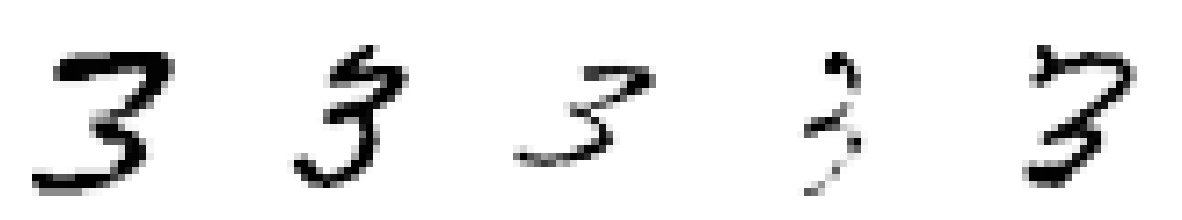

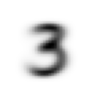

In [13]:

valid_tensors = [tensor(Image.open(p)).float()/255 for p in (path/"valid/3").ls()]

def process_diffs(tensors, avg_three, avg_seven, loss_func):
    fail = []
    for im in tensors:
        if (loss_func(im, avg_three) > loss_func(im, avg_seven)):
            fail.append((im, loss_func(im, avg_three), loss_func(im, avg_seven)))

    return fail

fail = process_diffs(valid_tensors, avg_three, avg_seven, l2_dist) 
print(f"failures: {len(fail)}")
show_images([i[0] for i in fail[0:5]])
show_image(avg_three)

print(fail[2][1], fail[2][2])


In [14]:
accuracy3 = is_3(valid_three_tensors).float().mean()
accuracy7 = 1 - is_3(valid_seven_tensors).float().mean()
accuracy3, accuracy7, (accuracy3 + accuracy7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [15]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
a_3 = valid_three_tensors[3]
a = mnist_distance(valid_three_tensors, avg_three)
a, a.shape

(tensor([0.1463, 0.1242, 0.1226,  ..., 0.1136, 0.1193, 0.1162]),
 torch.Size([1010]))

tensor([1., 0., 1.,  ..., 1., 1., 1.])

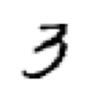

In [16]:
def is_3(x): return mnist_distance(x,avg_three) < mnist_distance(x,avg_seven)

show_image(a_3)

val = is_3(valid_three_tensors)
#, mnist_distance(a_3, avg_three), mnist_distance(a_3, avg_seven)

val.float()

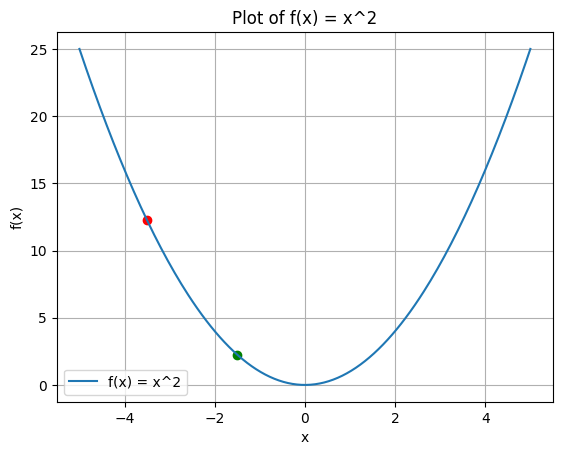

In [17]:
def f(x): return x**2
# Generate x values
x = np.linspace(-5, 5, 200)

# Compute y values
y = f(x)

# Plot the function
plt.plot(x, y, label='f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2')
plt.legend()
plt.grid(True)
plt.scatter(-1.5, f(-1.5), color='green')
plt.scatter(-3.5, f(-3.5), color='red')
plt.show()


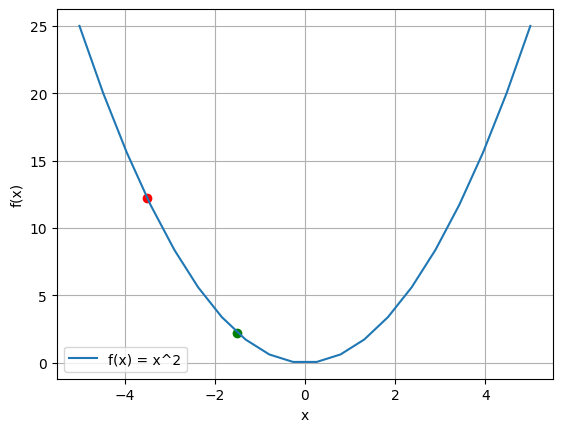

In [18]:
random.seed(42)
random.randint(0, 100)
x = np.linspace(-5, 5, 20)
y = f(x)

plt.plot(x, y, label='f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.scatter(-1.5, f(-1.5), color='green')
plt.scatter(-3.5, f(-3.5), color='red')
plt.show()


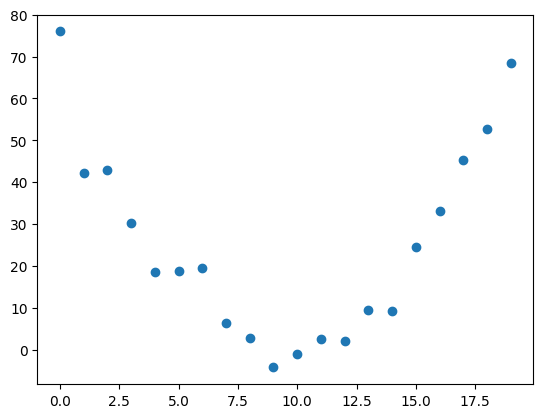

In [19]:
time = torch.arange(0, 20).float()
speed = torch.randn(20)*4 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [20]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): return ((preds-targets)**2).mean()

In [21]:
params = torch.randn(3).requires_grad_()

params

tensor([-0.7032,  1.1994, -1.4398], requires_grad=True)

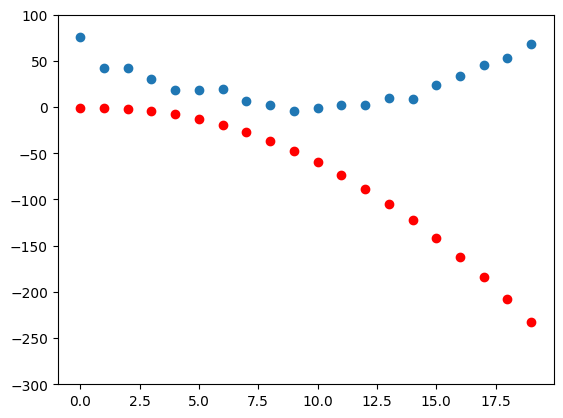

In [22]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
    
preds = f(time, params)
show_preds(preds)

In [23]:
loss = mse(preds, speed)
loss

tensor(17167.5977, grad_fn=<MeanBackward0>)

In [24]:
loss.backward()

In [25]:

params.grad, params.data

(tensor([-43072.0820,  -2743.3789,   -203.6438]),
 tensor([-0.7032,  1.1994, -1.4398]))

tensor(17167.5977, grad_fn=<MeanBackward0>)
tensor(961.2362, grad_fn=<MeanBackward0>)
tensor(735.3983, grad_fn=<MeanBackward0>)
tensor(692.6578, grad_fn=<MeanBackward0>)
tensor(684.5648, grad_fn=<MeanBackward0>)
tensor(683.0281, grad_fn=<MeanBackward0>)
tensor(682.7322, grad_fn=<MeanBackward0>)
tensor(682.6708, grad_fn=<MeanBackward0>)
tensor(682.6542, grad_fn=<MeanBackward0>)
tensor(682.6458, grad_fn=<MeanBackward0>)
tensor(682.6390, grad_fn=<MeanBackward0>)
tensor(682.6326, grad_fn=<MeanBackward0>)
tensor(682.6262, grad_fn=<MeanBackward0>)
tensor(682.6198, grad_fn=<MeanBackward0>)
tensor(682.6133, grad_fn=<MeanBackward0>)
tensor(682.6071, grad_fn=<MeanBackward0>)
tensor(682.6007, grad_fn=<MeanBackward0>)
tensor(682.5942, grad_fn=<MeanBackward0>)
tensor(682.5880, grad_fn=<MeanBackward0>)
tensor(682.5814, grad_fn=<MeanBackward0>)
tensor(682.5751, grad_fn=<MeanBackward0>)
tensor(682.5687, grad_fn=<MeanBackward0>)
tensor(682.5623, grad_fn=<MeanBackward0>)
tensor(682.5559, grad_fn=<MeanBa

(tensor(682.3904, grad_fn=<MeanBackward0>),
 tensor([ 0.0598,  1.2378, -1.4291], requires_grad=True))

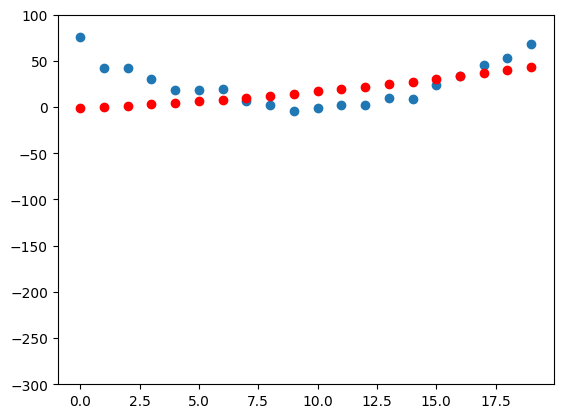

In [26]:
for i in range(50):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    print(loss)
    params.data -= 1e-5 * params.grad
    params.grad.zero_()
show_preds(preds)
loss, params

In [27]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [28]:

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [29]:
torch.cat([stacked_threes, stacked_sevens]).shape

torch.Size([12396, 28, 28])

In [30]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [31]:
valid_x = torch.cat([valid_three_tensors, valid_seven_tensors]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_three_tensors) + [0]*len(valid_seven_tensors)).unsqueeze(1)

In [32]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, avg_three)

tensor(0.1216)

In [33]:
valid_3_dist = mnist_distance(valid_three_tensors, avg_three)
valid_3_dist.shape


torch.Size([1010])

In [34]:
def is_3(x): return mnist_distance(x,avg_three) < mnist_distance(x,avg_seven)

In [35]:
is_3(valid_three_tensors)

tensor([ True, False,  True,  ...,  True,  True,  True])

In [36]:
torch.sum(is_3(valid_three_tensors) == False)

accuracy_3s =      is_3(valid_three_tensors).float() .mean()
accuracy_7s = (1 - is_3(valid_seven_tensors).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Gradient Descent

In [37]:
dset = list(zip(train_x, train_y))
valid_dset = list(zip(valid_x, valid_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [38]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [39]:
weights = init_params((28*28,1))


In [40]:
bias = init_params(1)
bias

tensor([-1.0302], requires_grad=True)

In [41]:
(train_x[0]*weights.T).sum() + bias
train_x[0]*weights.T

tensor([[-0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,
         -0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000, -0.0000,  0.0000,
         -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
          0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,
         -0.0000,  0.0000,  0.0000, -0.0000,  0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000, -0.0000,
          0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,
         -0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -0.0000,
          0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
         -0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
          0.0000,  0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
          0.0000,  0.0000, -

In [42]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
corrects = (preds>0.0).float() == train_y
#train_x.shape, preds.shape, weights.shape
corrects.float().mean().item()  


0.4678122103214264

In [43]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

mnist_loss(preds, train_y)

tensor(0.5275, grad_fn=<MeanBackward0>)

### Matrix Multiplication and torch.where 

In [44]:
a = [[i for i in range(5)] for j in range(5)]
b = [[i+1 for i in range(2)] for j in range(5)]
a = tensor(a)
b = tensor(b)
a,b,a@b



(tensor([[0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4],
         [0, 1, 2, 3, 4]]),
 tensor([[1, 2],
         [1, 2],
         [1, 2],
         [1, 2],
         [1, 2]]),
 tensor([[10, 20],
         [10, 20],
         [10, 20],
         [10, 20],
         [10, 20]]))

In [45]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])


torch.where(trgts==1, 1-prds, prds), mnist_loss(prds, trgts)

(tensor([0.1000, 0.4000, 0.8000]), tensor(0.4460))

## Gradient descent continued

In [46]:
loss = mnist_loss(preds, train_y)
loss
#loss.backward()


tensor(0.5275, grad_fn=<MeanBackward0>)

### One Epoch

In [47]:
for i in range(500):
    loss.backward()
    #print(loss, weights.grad.mean(), bias.grad)
    with torch.no_grad():
        weights -= weights.grad * 1e-1
        bias -= bias.grad * 1e-1
        #bias = tensor(0.0)
        weights.grad.zero_()
        bias.grad.zero_()
    preds = linear1(valid_x)
    loss = mnist_loss(preds, valid_y)

loss, weights[:3], weights.grad[:3], sum(weights)

(tensor(0.0822, grad_fn=<MeanBackward0>),
 tensor([[-2.3897],
         [-0.6222],
         [ 0.9278]], grad_fn=<SliceBackward0>),
 tensor([[0.],
         [0.],
         [0.]]),
 tensor([-17.4326], grad_fn=<AddBackward0>))

In [79]:
weights = init_params((28*28,1))
bias = init_params(1)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)


In [1161]:
results = []
for z in range(100):
    for x,y in dl:
        preds = linear1(x)
        loss = mnist_loss(preds, y)
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * 1e0
            weights.grad.zero_()
            bias -= bias.grad * 1e0
            bias.grad.zero_()

    preds = linear1(valid_x)
    accuracy = ((preds>0.0).float() == valid_y).float().mean()
    results.append(accuracy)

preds = linear1(valid_x)
accuracy = ((preds>0.0).float() == valid_y).float().mean()
loss.item(), accuracy

#ax = plt.subplots()[1]
#ax.scatter(range(len(results)), results)
#plt.plot(results)



(0.016819728538393974, tensor(0.9814))

In [1162]:
## Using the libs

In [ ]:

class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters(), 1)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')
    


In [71]:
linear_model = nn.Linear(28*28,1)
opt = BasicOptim(linear_model.parameters(), 1)
train_model(linear_model, 20)

0.4932 0.4932 0.4932 0.7588 0.9023 0.935 0.9511 0.9619 0.9663 0.9687 0.9697 0.9697 0.9721 0.9731 0.9741 0.9755 0.9765 0.977 0.9775 0.978 

### With Fastai

In [72]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr=1)
train_model(linear_model, 20)  

0.4932 0.4932 0.9339 0.832 0.9218 0.9394 0.9536 0.9624 0.9663 0.9682 0.9692 0.9711 0.9721 0.9741 0.9755 0.976 0.9765 0.977 0.9775 0.978 

In [90]:
dls = DataLoaders(dl, valid_dl)
learner = Learner(dls, model=nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learner.fit(40, lr=1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636974,0.503382,0.495584,00:00
1,0.494892,0.189643,0.838077,00:00
2,0.182412,0.177763,0.838077,00:00
3,0.080507,0.105522,0.913641,00:00
4,0.042975,0.077348,0.932777,00:00
5,0.028320,0.062141,0.947007,00:00
6,0.022291,0.052651,0.954858,00:00
7,0.019601,0.046315,0.961727,00:00
8,0.018229,0.041847,0.965162,00:00
9,0.017399,0.038547,0.966634,00:00


## Adding non linearity

In [50]:
nbset = 30
w1 = init_params((28*28,nbset))
b1 = init_params(nbset)
w2 = init_params((nbset,1))
b2 = init_params(1)
w1.shape

torch.Size([784, 30])

In [103]:
nbset = 50
simple_net = nn.Sequential(
    nn.Linear(28*28,nbset*4),
    nn.ReLU(),
    nn.Linear(nbset*4, nbset*2),
    nn.ReLU(),
    nn.Linear(nbset*2, nbset),
    nn.ReLU(),
    nn.Linear(nbset,1)
)
dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit_one_cycle(40, 2)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.501334,0.487820,0.504416,00:00
1,0.332627,0.480422,0.504416,00:00
2,0.147486,0.260911,0.749755,00:00
3,0.065267,0.156049,0.849362,00:00
4,0.033833,0.120617,0.881747,00:00
5,0.021043,0.102492,0.900393,00:00
6,0.015421,0.085410,0.916585,00:00
7,0.012484,0.090856,0.909715,00:00
8,0.011756,0.073993,0.926889,00:00
9,0.011327,0.056881,0.943572,00:00


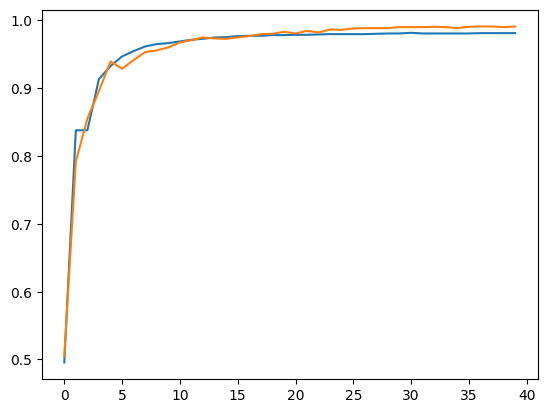

In [101]:
#plt.plot(L(learn.recorder.values).itemgot(2))
#learn.recorder.plot_loss()

accs = [r[2] for r in learn.recorder.values]
epochs = range(len(accs))
#plt.plot(epochs, accs, 'b-', marker='o', linewidth=2, markersize=8)
plt.plot( L(learner.recorder.values).itemgot(2), label='Linear')
plt.plot(L(learn.recorder.values).itemgot(2), label='Non-Linear')
